# Regression Analysis (II)

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors** (sparse models).
We present different regression models: Simple linear regression, Multiple linear regression and Polynomial regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library, as well as other toolboxes.

We use different real data sets:
* Macroeconomic dataset
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Diabetes Scikit-learn dataset
* Longley dataset of US macroeconomic data
* Advertising dataset

### Contents of the notebook:

- Multiple Linear Regression
- Regularization: Ridge and Lasso
- Data Transformation

In [1]:
# Settings for the visualizations
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score

In [3]:
seed = 1 # to make this notebook's output stable across runs

## Example 1: Boston Housing

Let's continue with our Boston Housing dataset.

In [4]:
from pandas import read_csv
import pandas as pd
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('files/housing.csv', header=None, delimiter=r"\s+", names=column_names)

X_boston = df_boston.drop('MEDV', axis=1)  # Select features (all columns except 'PRICE')
y_boston = df_boston['MEDV']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [5]:
# Fitting a multiple linear model
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting


# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_train))
print('R^2 Score: {}'.format(r2score_test))


Intercept and coefs:
30.246750993923865 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]

MSE: 24.291119474973442
R^2 Score: 0.7508856358979672
R^2 Score: 0.668759493535633


<Axes: title={'center': 'Model Coefficients'}>

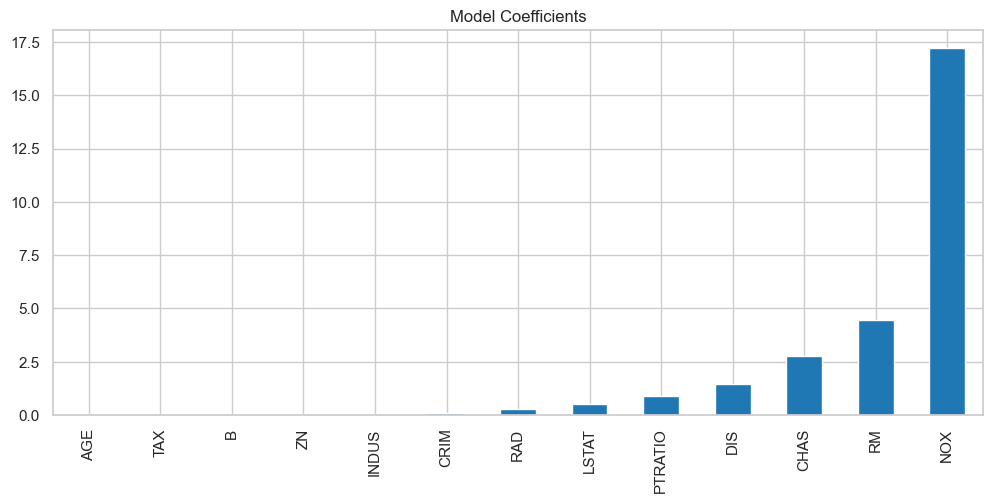

In [6]:
# Plotting abs value of model coefficients
coefs_lr.plot(kind='bar', title='Model Coefficients')

## Regularization Models 



### L2 Regularization: Ridge Regression.

Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model. 

$$ minimize(\sum_{i=0}^n (y_i - \beta_0- \sum_{j=1}^p \beta_jx_{ij})^2 + \alpha\sum_{j=1}^p \beta_j^2) $$
 
where $\beta_j$ are the regression coefficients.


### L1 Regularization: Lasso Regression

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *Lasso* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.

For that, Lasso regression adds a **$\ell_1$-norm** regularization term to the sum of squared errors of prediction (SSE).  Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - \beta_0- \sum_{j=1}^p \beta_jx_{ij})^2 + \alpha\sum_{j=1}^p|\beta_j|)$$


### Geometric interpretation of regularization

The left panel shows L1 regularization (lasso regularization) and the right panel L2 regularization (Ridge regression). The ellipses indicate the distribution for no regularization. The shapes (square and cercle) show the constraints due to regularization (limiting  $\theta^2$  for ridge regression and $|\theta|$ for Lasso regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.

<center><img src="files/images/regularization-ridge-lasso.png"></center>



More info [here](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

### Ridge


In [7]:
## Ridge Regression
ridge = linear_model.Ridge(alpha=1) # Create a Ridge regressor
ridge.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_ridge = pd.Series(np.abs(ridge.coef_), features).sort_values()

# Prediction
y_test_pred_ridge = ridge.predict(X_test)

# evaluation
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2score_ridge_train = ridge.score(X_train, y_train)
r2score_ridge_test = ridge.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(ridge.intercept_, ridge.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse_ridge))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score train: {}'.format(r2score_ridge_train))
print('R^2 Score test: {}'.format(r2score_ridge_test))


Intercept and coefs:
25.104099233774694 [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]

MSE: 24.477191227708644
R^2 Score train: 0.7487825119234438
R^2 Score test: 0.6662221670168523


<Axes: title={'center': 'Ridge Coefficients'}>

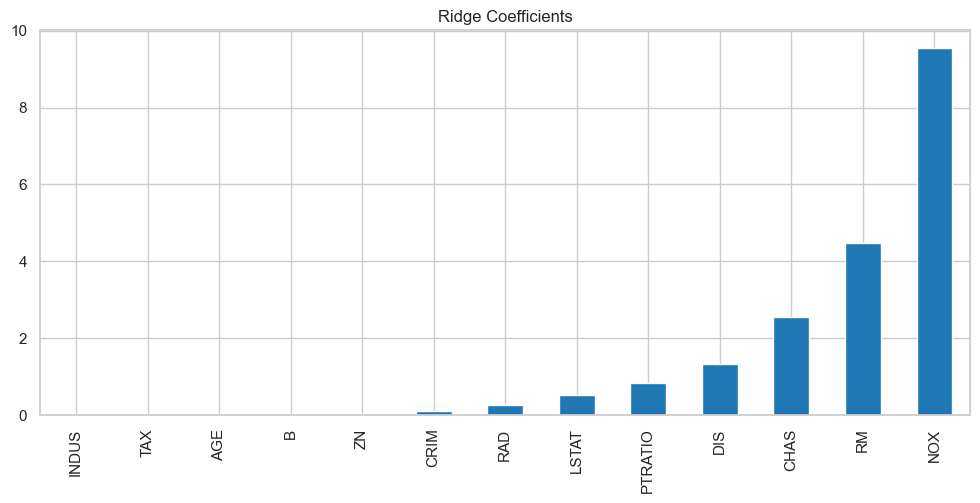

In [8]:
# Plotting abs value of model coefficients
coefs_ridge.plot(kind='bar', title='Ridge Coefficients')

### Lasso


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

<p>
Fit a Lasso regressor and evalute it.

</div>

In [9]:
## Lasso Regression
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Regrerssion coefs
coefs_lasso = pd.Series(np.abs(lasso.coef_), features).sort_values()

# Prediction
y_test_pred_lasso = lasso.predict(X_test)

# evaluation
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

r2score_lasso_train = lasso.score(X_train, y_train)
r2score_lasso_test = lasso.score(X_test, y_test)


# The coefficients

# The mean squared error

# The coefficient of determination: 1 is perfect prediction
print(mse_lasso)
print(r2score_lasso_train, r2score_lasso_test)



24.409489761299707
0.6959153721670908 0.6671453631686304


<Axes: title={'center': 'Lasso Coefficients'}>

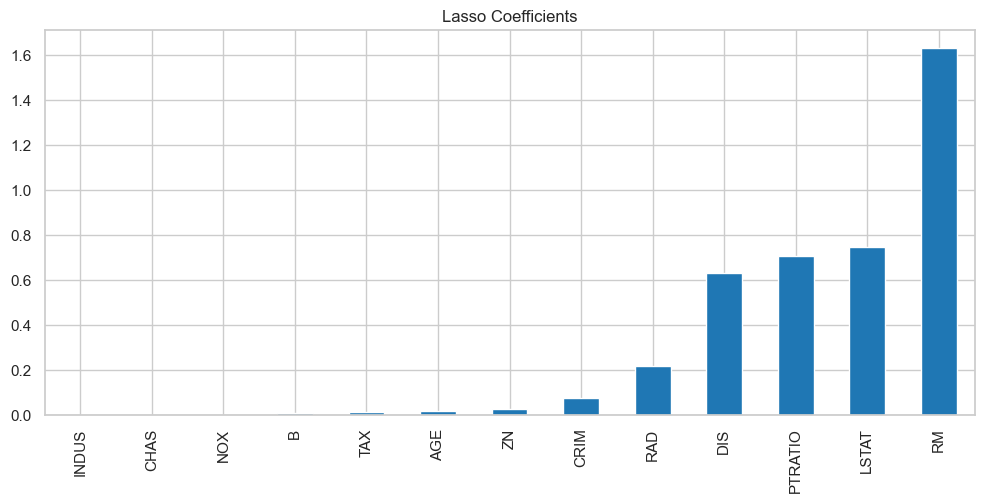

In [10]:
# Plotting abs value of model coefficients
coefs_lasso.plot(kind='bar', title='Lasso Coefficients')


In [11]:
coefs_lasso

INDUS      0.000000
CHAS       0.000000
NOX        0.000000
B          0.011181
TAX        0.012286
AGE        0.016395
ZN         0.028501
CRIM       0.076609
RAD        0.219654
DIS        0.630858
PTRATIO    0.708582
LSTAT      0.747107
RM         1.630489
dtype: float64

#### Compare the results

In [12]:
# Are the coeficients now sparse?
# Is the score different?

<Axes: title={'center': 'coefs_lasso'}>

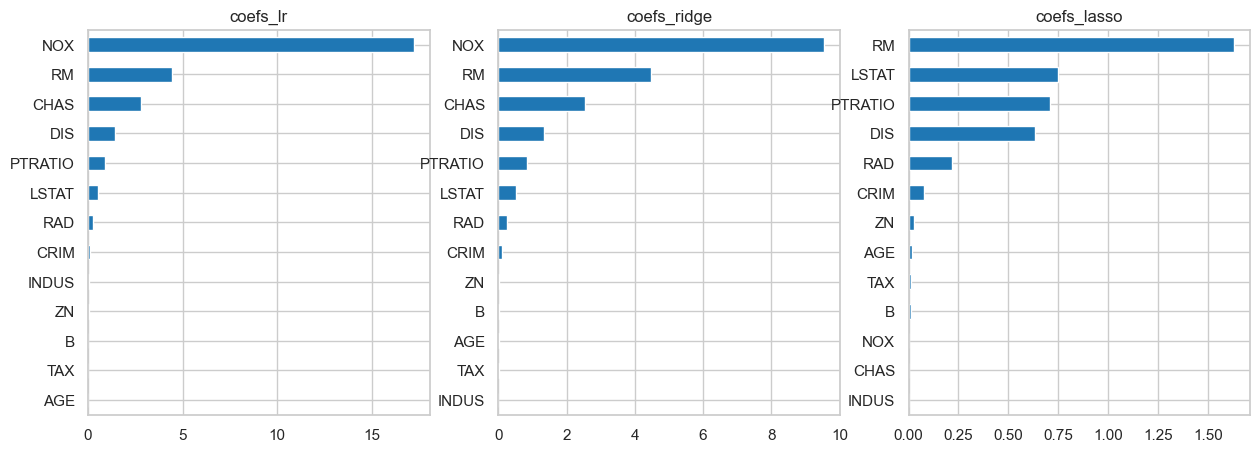

In [13]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr.plot(kind="barh", title='coefs_lr', ax=ax1)
coefs_ridge.plot(kind="barh", title='coefs_ridge', ax=ax2)
coefs_lasso.plot(kind="barh", title='coefs_lasso', ax=ax3)

In [14]:
print('Non important variables: {}'.format(coefs_lasso.index[coefs_lasso==0].values))
print('Most important variable: {}'.format(coefs_lasso.index[-1]))

Non important variables: ['INDUS' 'CHAS' 'NOX']
Most important variable: RM


In [15]:
scores = [[r2score_train, r2score_test],
         [r2score_ridge_train, r2score_ridge_test],
         [r2score_lasso_train, r2score_lasso_test]]
df_scores = pd.DataFrame(scores, columns=["Train", "Test"], index=["No regularization", "Ridge", "Lasso"])
#df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,Train,Test
No regularization,0.750886,0.668759
Ridge,0.748783,0.666222
Lasso,0.695915,0.667145
